# 2  K-Nearest Neighbours

In [2]:
import pandas as pd
import matplotlib.pyplot as mpl
import plotly.express as px
import seaborn as sns

import numpy as np
from collections import Counter

#### 2.1 load the data

In [3]:
ds = 'dataset.csv'
d = pd.read_csv(ds, low_memory=False)

d.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#### 2.1 clean the data

In [4]:
d = d.dropna(subset = ['track_id', 'track_name'])
d = d.drop_duplicates(subset = 'track_id', keep = 'first')
d = d.drop_duplicates(subset = ['track_name', 'artists', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
                                 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                                 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'], 
                                 keep = 'first')
d['explicit'] = d['explicit'].astype(int)
d

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### Task 1
#### Visualizations

Generate suitable plots that show distributions of various features in the dataset. You are allowed to use standard libraries like Matplotlib.
Write comments about what you observe (for example, outliers, skewed data, etc) 

Also, try to visualize different combinations of features to try and understand the correlation of the features with the target variable. Doing so will be useful for some of the upcoming tasks.

Try coming up with a hierarchy of which columns are more necessary than
others for the classification task based on the data exploration. Mention all these results in the report.

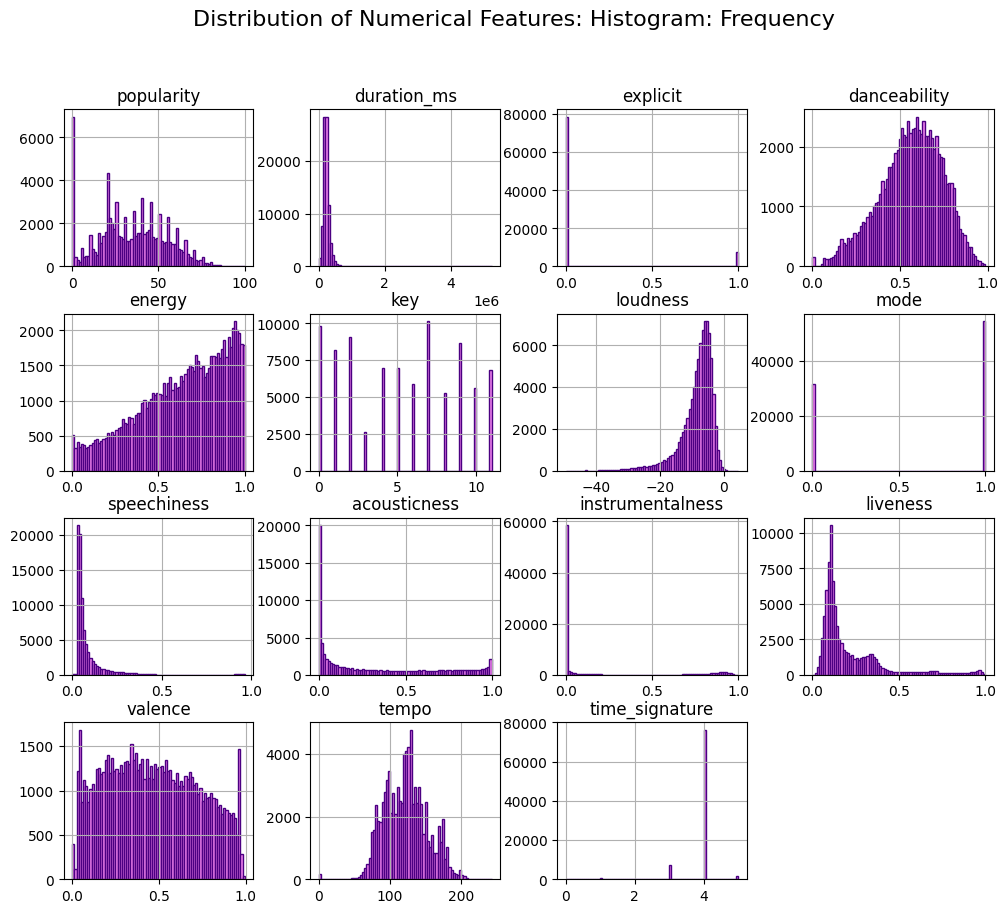

In [5]:
dp = d.drop(d.columns[0], axis=1)

dp.hist(figsize=(12, 10), bins = 80, color= 'violet', edgecolor = 'indigo')
mpl.suptitle('Distribution of Numerical Features: Histogram: Frequency', fontsize=16)
mpl.ylabel('frequency')
mpl.show()

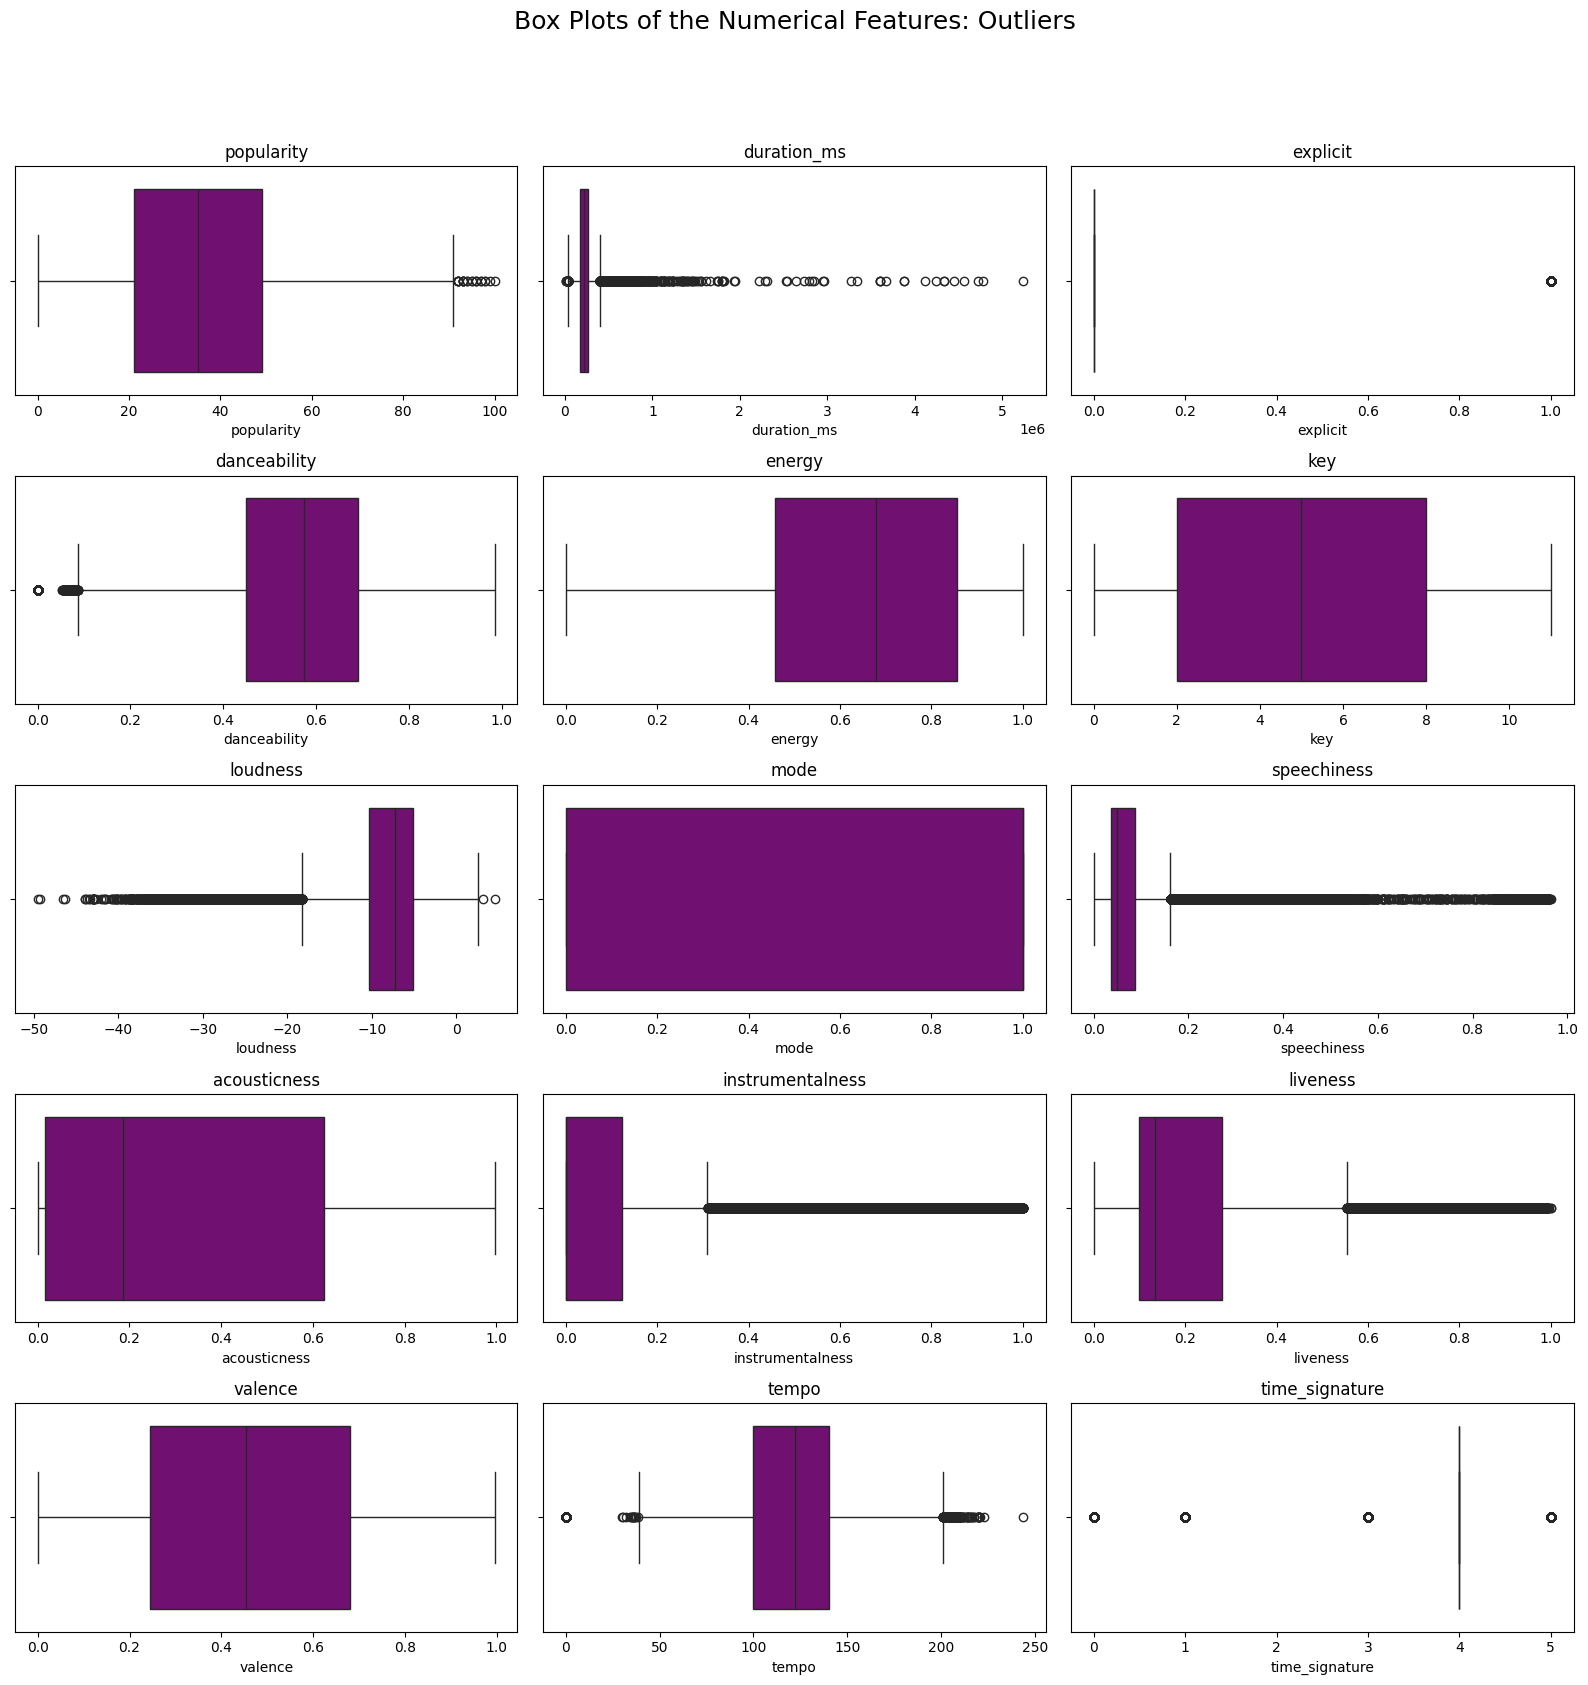

In [6]:
fig, axes = mpl.subplots(nrows=5, ncols=3, figsize=(16, 16))
axes = axes.flatten()
mpl.suptitle('Box Plots of the Numerical Features: Outliers', fontsize=18, y=1.05)

num_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
           'key', 'loudness', 'mode', 'speechiness', 'acousticness',
           'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

for i, col in enumerate(num_cols):
    sns.boxplot(data=d, x=col, ax=axes[i], color='purple')
    axes[i].set_title(col)

mpl.tight_layout()
mpl.show()

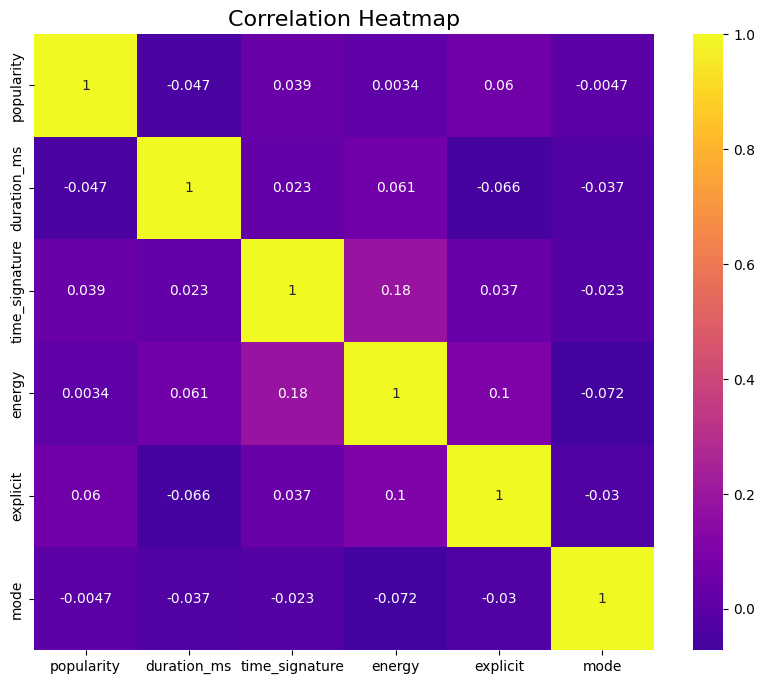

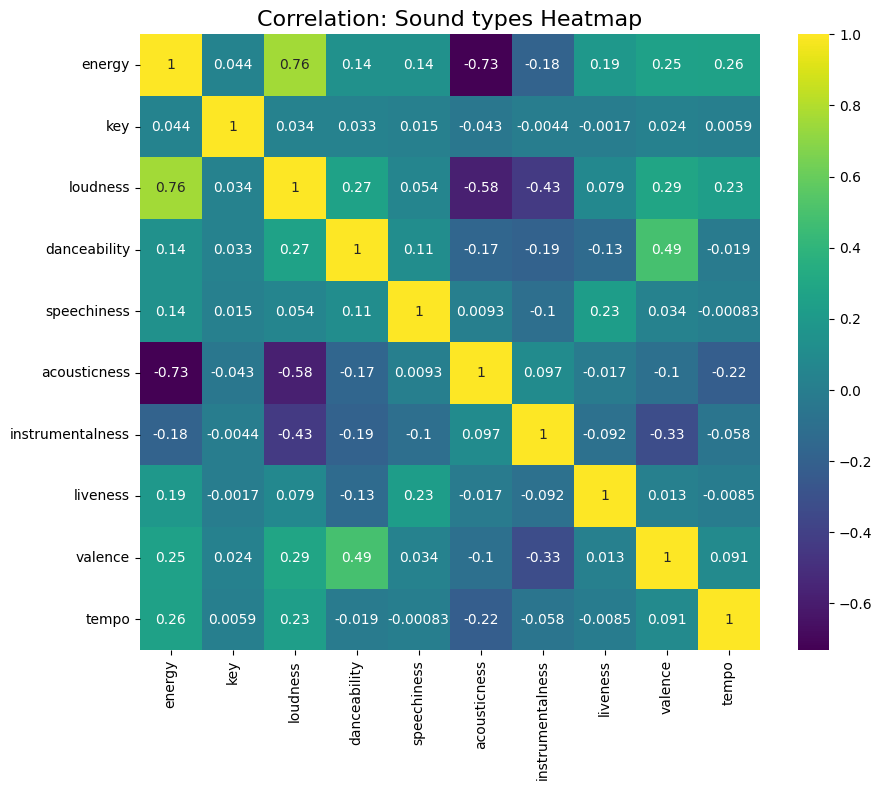

In [7]:
ndp = dp.select_dtypes(include=[np.number])
ndi_1 = ['popularity', 'duration_ms', 'time_signature', 'energy', 'explicit', 'mode']
ndp_1 = ndp[ndi_1]
corr_matrix_1 = ndp_1.corr()

ndi_2 = ['energy', 'key', 'loudness', 'danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
ndp_2 = ndp[ndi_2]
corr_matrix_2 = ndp_2.corr()  

mpl.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_1, annot=True, cmap='plasma', center=0.4)
mpl.title('Correlation Heatmap', fontsize=16)

mpl.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2, annot=True, cmap='viridis')
mpl.title('Correlation: Sound types Heatmap', fontsize=16)
mpl.show()

In [8]:
ndp_3 = dp.groupby('track_genre')[ndi_2].mean().reset_index()

ndp_3['track_genre_numeric'] = ndp_3['track_genre'].astype('category').cat.codes
fig = px.parallel_coordinates(ndp_3, 
                              dimensions=ndi_2, 
                              color='track_genre_numeric',
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title="Parallel Coordinates Plot of Features by Track Genre")

fig.show()

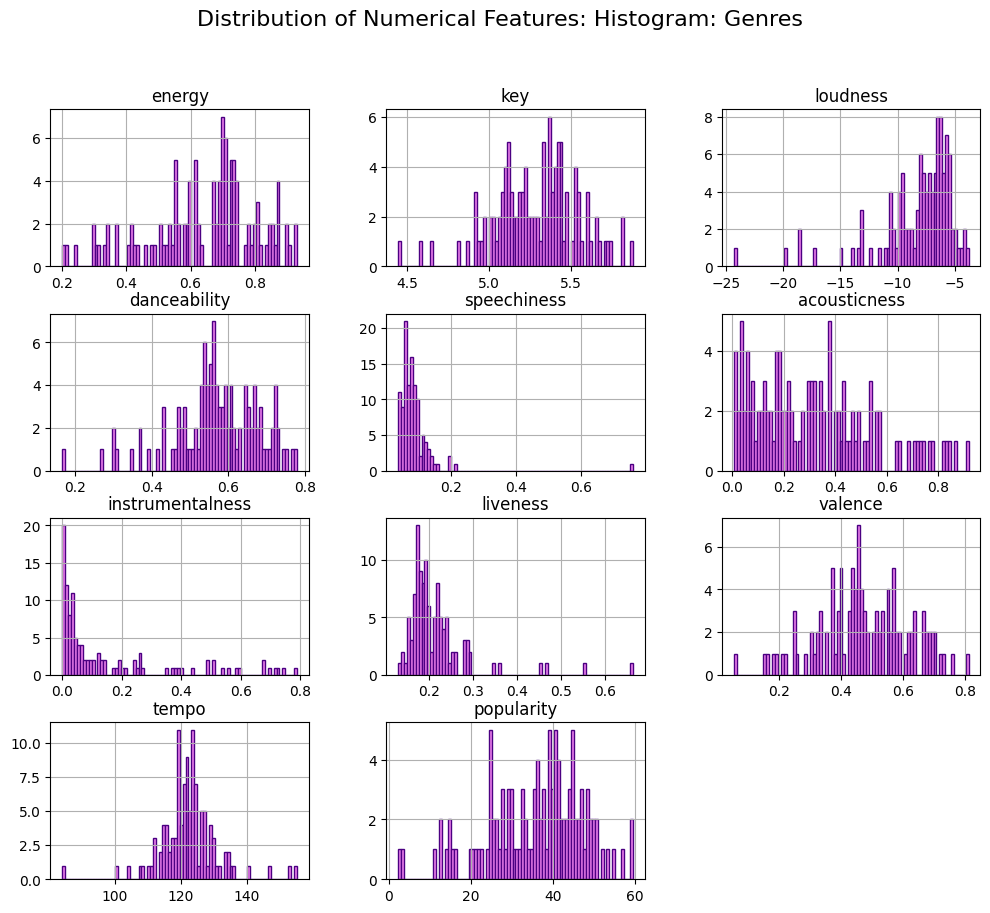

In [9]:
grouped_dp = dp.groupby('track_genre')[ndi_2 + ['popularity']].mean().reset_index()

grouped_dp.hist(figsize=(12, 10), bins = 80, color= 'violet', edgecolor = 'indigo')
mpl.suptitle('Distribution of Numerical Features: Histogram: Genres', fontsize=16)
mpl.ylabel('frequency')
mpl.show()

###### no. of genres for each feature varied by how much.

### 2.3 KNN Implementation

2.3.1 Task 2

In [10]:
def min_max_scaling(c):
    return (c-c.min())/(c.max()-c.min())
def normalize(d, cols):
    dnorm = d.copy()
    for c in cols:
        dnorm[c] = min_max_scaling(d[c])
    return dnorm
def one_hot_encode(d, cols):
    d_ohe = pd.get_dummies(d, columns = cols, drop_first = True)
    return d_ohe
    
dnormcols = ['popularity', 'duration_ms', 'loudness', 'tempo', 'time_signature']
dnorm = normalize(d, dnormcols)
d_ohe = one_hot_encode(dnorm, ['key'])
oh_cols = [c for c in d_ohe.columns if c.startswith('key_')]
d_ohe[oh_cols] = d_ohe[oh_cols].astype(int)
    
shuf_i = np.random.RandomState(seed = 42).permutation(len(d_ohe))
d_shuf = d_ohe.iloc[shuf_i].reset_index(drop = True)

train_sz = int(0.8*len(d_shuf))
test_sz = int(0.1*len(d_shuf))
val_sz = 100-test_sz-train_sz

d_train = d_shuf[:train_sz]
d_test = d_shuf[train_sz:(train_sz + test_sz)]
d_val = d_shuf[(train_sz + test_sz):]

X_train = d_train.drop(columns=['Unnamed: 0','track_genre', 'track_id', 'artists',
                                 'album_name', 'track_name', 'explicit'])
X_test = d_test.drop(columns=['Unnamed: 0','track_genre', 'track_id', 'artists',
                               'album_name', 'track_name', 'explicit'])
X_val = d_val.drop(columns=['Unnamed: 0','track_genre', 'track_id', 'artists',
                             'album_name', 'track_name', 'explicit'])

Y_train = d_train['track_genre']
Y_test = d_test['track_genre']
Y_val = d_val['track_genre']

X_train.head()


,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.57,0.075510,0.432,0.553,0.803710,1,0.0556,0.505000,0.000000,0.2070,...,1,0,0,0,0,0,0,0,0,0
1,0.42,0.029768,0.529,0.737,0.824501,1,0.0661,0.570000,0.000000,0.0602,...,0,0,0,0,0,1,0,0,0,0
2,0.40,0.051344,0.326,0.884,0.785861,0,0.0384,0.000531,0.894000,0.0776,...,0,0,0,0,1,0,0,0,0,0
3,0.34,0.019961,0.452,0.930,0.829921,1,0.0482,0.000078,0.000022,0.1350,...,0,0,0,0,0,0,0,1,0,0
4,0.29,0.022653,0.598,0.599,0.726301,1,0.0823,0.326000,0.000015,0.1170,...,0,1,0,0,0,0,0,0,0,0


In [11]:
class KNN:
	def __init__(self, k, dm):
		self.k = k
		self.dist_met = dm
	
	def getset_k(self, gs, k = None):
		if gs==0:
			self.k = k
		else:
			return self.k  
		
	def getset_dm(self, gs, dm = None):
		if gs==0:
			self.dist_met = dm
		else:
			return self.dist_met
		
	def _manhattan(self, p, q):
		d = np.sum(np.abs(p - q), axis=1)
		return d
	
	def _euclidean(self, p, q):
		d = np.linalg.norm((p - q), axis=1)
		return d
	
	def _cosine(self, p, q):
		mag_p = np.linalg.norm(p, axis=1)
		mag_q = np.linalg.norm(q, axis=1)
		cs = np.dot(p, q)/(mag_p*mag_q)
		d = 1 - cs
		return d
		
	def _calc_dist(self, p, q):
		if self.dist_met == 'manhattan':
			return self._manhattan(p, q)
		elif self.dist_met == 'euclidean':
			return self._euclidean(p, q)
		elif self.dist_met == 'cosine':
			return self._cosine(p, q)
		else: 
			raise ValueError("Unsupported Distance Metric")
	
	def update(self, Xtrain, Ytrain, Xtest, Ytest, Xval, Yval):
		self.X_train = Xtrain
		self.Y_train = Ytrain
		self.X_test = Xtest
		self.Y_test = Ytest
		self.X_val = Xval
		self.Y_val = Yval
		
	def prediction(self, X):
		p = []

		for point_test in X:
			ds = self._calc_dist(self.X_train, point_test)
			ki = np.argpartition(ds, self.k)[:self.k]
			knl = self.Y_train[ki]
			most_common_label = Counter(knl.flatten()).most_common(1)[0][0]
			p.append(most_common_label)

		return np.array(p)
	
	def evaluate(self, X, y, Metrics):
		Y_pred = self.prediction(X)
		metrics = Metrics(y, Y_pred)
		results = {
			'Metric': ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1 Score', 
					   'Micro Precision', 'Micro Recall', 'Micro F1 Score'],
			'Score': [
				metrics.accuracy(),
				metrics.macro_average()[0],
				metrics.macro_average()[1],
				metrics.macro_average()[2],
				metrics.micro_average()[0],
				metrics.micro_average()[1],
				metrics.micro_average()[2]
			]
		}
		return results
		   
	

In [12]:
class Metrics:
	def __init__(self, y, y_p):
		self.y_true = np.array(y)
		self.y_pred = np.array(y_p)
		self.labels = np.unique(y)

	def accuracy(self):
		# A = TP+TN/total
		tp_tn = np.sum(self.y_true == self.y_pred)
		tot = len(self.y_true)
		A = tp_tn/tot
		return A
	
	def precision(self):  
		# P = TP/(TP+FP)
		Pscores = {}
		for label in self.labels:
			tp = np.sum((self.y_true == label) & (self.y_pred == label))
			fp = np.sum((self.y_true != label) & (self.y_pred == label))
			Pscores[label] = tp/(tp+fp) if tp+fp > 0 else 0 
		return Pscores

	def recall(self):
		# R = TP/(TP+FN)
		Rscores = {}
		for label in self.labels:
			tp = np.sum((self.y_true == label) & (self.y_pred == label))
			fn = np.sum((self.y_true == label) & (self.y_pred != label))
			Rscores[label] = tp/(tp+fn) if tp+fn > 0 else 0
		return Rscores
	
	def _macro_P(self, classes):
		Ps = []
		for c in classes:
			tp = np.sum((self.y_true == c) & (self.y_pred == c))
			pp = np.sum(self.y_pred == c)
			p = tp/pp if pp > 0 else 0 
			Ps.append(p)
		P = np.sum(Ps)/len(classes)
		return P
	def _macro_R(self, classes):
		Rc = []
		for c in classes:
			tp = np.sum((self.y_true == c) & (self.y_pred == c))
			ap = np.sum(self.y_true == c)
			r = tp/ap if ap > 0 else 0
			Rc.append(r)
		R = np.sum(Rc)/len(classes)
		return R 
	def macro_f1_score(self, classes):
		P = self._macro_P(classes)
		R = self._macro_R(classes)
		F1 = 2*(P*R)/(P+R) if (P+R) > 0 else 0
		return F1
	
	def _micro_P(self):
		tp = 0
		fp = 0
		for label in self.labels:
			tp += np.sum((self.y_true == label) & (self.y_pred == label))
			fp += np.sum((self.y_true != label) & (self.y_pred == label))
		pp = tp + fp
		P = tp/pp if pp > 0 else 0 
		return P
	def _micro_R(self):
		tp = 0
		fn = 0
		for label in self.labels:
			tp += np.sum((self.y_true == label) & (self.y_pred == label))
			fn += np.sum((self.y_true == label) & (self.y_pred != label))
		ap = tp + fn
		R = tp/ap if ap > 0 else 0
		return R 
	def micro_f1_score(self):
		P = self._micro_P()
		R = self._micro_R()
		F1 = 2*(P*R)/(P+R) if (P+R) > 0 else 0
		return F1
	
	def macro_average(self):
		P = self._macro_P(self.labels)
		R = self._macro_R(self.labels)
		F1 = self.macro_f1_score(self.labels)
		return P, R, F1

	def micro_average(self):
		P = self._micro_P()
		R = self._micro_R()
		F1 = self.micro_f1_score()
		return P, R, F1

#f-1 score, accuracy, precision, and recall after splitting the provided dataset into train and val subsets. 

In [13]:
metric = 'manhattan'
for k in range(20, 31):
	kn = KNN(k, metric)
	kn.update(X_train.to_numpy(), Y_train.to_numpy(), 
				X_test.to_numpy(), Y_test.to_numpy(), 
				X_val.to_numpy(), Y_val.to_numpy())
	Y_val_pred = kn.prediction(X_val.to_numpy())
	h = Metrics(Y_val.to_numpy(), Y_val_pred)
	print(k,'\n')
	print('accuracy = ', h.accuracy())
	print('precision scores = ', h.precision())
	print('recall scores = ', h.recall())
	print('micro: P =', h.micro_average()[0],'R =',h.micro_average()[1], 'F1 =', h.micro_average()[2])
	print('macro: P =', h.macro_average()[0],'R =',h.macro_average()[1], 'F1 =', h.macro_average()[2])
	print('\n')

20 

accuracy =  0.21766414875072632
precision scores =  {'acoustic': 0.11570247933884298, 'afrobeat': 0.16417910447761194, 'alt-rock': 0.24193548387096775, 'alternative': 0.0, 'ambient': 0.22, 'anime': 0.08571428571428572, 'black-metal': 0.375, 'bluegrass': 0.2727272727272727, 'blues': 0.03225806451612903, 'brazil': 0.0963855421686747, 'breakbeat': 0.2535211267605634, 'british': 0.0625, 'cantopop': 0.147239263803681, 'chicago-house': 0.28, 'children': 0.28169014084507044, 'chill': 0.20212765957446807, 'classical': 0.5178571428571429, 'club': 0.23255813953488372, 'comedy': 0.9534883720930233, 'country': 0.13414634146341464, 'dance': 0.17525773195876287, 'dancehall': 0.14457831325301204, 'death-metal': 0.25882352941176473, 'deep-house': 0.16129032258064516, 'detroit-techno': 0.24074074074074073, 'disco': 0.1566265060240964, 'disney': 0.3114754098360656, 'drum-and-bass': 0.29292929292929293, 'dub': 0.13592233009708737, 'dubstep': 0.0, 'edm': 0.06153846153846154, 'electro': 0.15, 'electro

KeyboardInterrupt: 

In [14]:
kn = KNN(29 , metric)
kn.update(X_train.to_numpy(), Y_train.to_numpy(), 
			X_test.to_numpy(), Y_test.to_numpy(), 
			X_val.to_numpy(), Y_val.to_numpy())
Y_val_pred = kn.prediction(X_val.to_numpy())
h = Metrics(Y_val.to_numpy(), Y_val_pred)
print(k,'\n')
print('accuracy = ', h.accuracy())
print('precision scores = ', h.precision())
print('recall scores = ', h.recall())
print('micro: P =', h.micro_average()[0],'R =',h.micro_average()[1], 'F1 =', h.micro_average()[2])
print('macro: P =', h.macro_average()[0],'R =',h.macro_average()[1], 'F1 =', h.macro_average()[2])
print('\n')

22 

accuracy =  0.21963974433468914
precision scores =  {'acoustic': 0.1259259259259259, 'afrobeat': 0.25, 'alt-rock': 0.20689655172413793, 'alternative': 0.0, 'ambient': 0.2391304347826087, 'anime': 0.14516129032258066, 'black-metal': 0.36363636363636365, 'bluegrass': 0.2751677852348993, 'blues': 0.08333333333333333, 'brazil': 0.11594202898550725, 'breakbeat': 0.234375, 'british': 0.038461538461538464, 'cantopop': 0.143646408839779, 'chicago-house': 0.2706766917293233, 'children': 0.3230769230769231, 'chill': 0.2268041237113402, 'classical': 0.48148148148148145, 'club': 0.2857142857142857, 'comedy': 0.9318181818181818, 'country': 0.1780821917808219, 'dance': 0.17525773195876287, 'dancehall': 0.16129032258064516, 'death-metal': 0.2111111111111111, 'deep-house': 0.13872832369942195, 'detroit-techno': 0.24299065420560748, 'disco': 0.14285714285714285, 'disney': 0.3333333333333333, 'drum-and-bass': 0.2826086956521739, 'dub': 0.1282051282051282, 'dubstep': 0.0, 'edm': 0.047619047619047616

In [ ]:
metric = 'euclidean'
for k in range(25, 31):
	kn = KNN(k, metric)
	kn.update(X_train.to_numpy(), Y_train.to_numpy(), 
				X_test.to_numpy(), Y_test.to_numpy(), 
				X_val.to_numpy(), Y_val.to_numpy())
	Y_val_pred = kn.prediction(X_val.to_numpy())
	h = Metrics(Y_val.to_numpy(), Y_val_pred)
	print(k,'\n')
	print('accuracy = ', h.accuracy())
	print('precision scores = ', h.precision())
	print('recall scores = ', h.recall())
	print('micro: P =', h.micro_average()[0],'R =',h.micro_average()[1], 'F1 =', h.micro_average()[2])
	print('macro: P =', h.macro_average()[0],'R =',h.macro_average()[1], 'F1 =', h.macro_average()[2])
	print('\n')

accuracy =  0.18965717606042998
precision scores =  {'acoustic': 0.12295081967213115, 'afrobeat': 0.2153846153846154, 'alt-rock': 0.17857142857142858, 'alternative': 0.125, 'ambient': 0.26506024096385544, 'anime': 0.15151515151515152, 'black-metal': 0.3300970873786408, 'bluegrass': 0.21052631578947367, 'blues': 0.12903225806451613, 'brazil': 0.05952380952380952, 'breakbeat': 0.16853932584269662, 'british': 0.03225806451612903, 'cantopop': 0.15337423312883436, 'chicago-house': 0.18518518518518517, 'children': 0.23684210526315788, 'chill': 0.1440677966101695, 'classical': 0.4406779661016949, 'club': 0.25, 'comedy': 0.9318181818181818, 'country': 0.13333333333333333, 'dance': 0.1797752808988764, 'dancehall': 0.10309278350515463, 'death-metal': 0.23333333333333334, 'deep-house': 0.12666666666666668, 'detroit-techno': 0.21428571428571427, 'disco': 0.12307692307692308, 'disney': 0.28846153846153844, 'drum-and-bass': 0.21875, 'dub': 0.11764705882352941, 'dubstep': 0.0, 'edm': 0.10447761194029

In [ ]:
print("Y_pred shape:", Y_val_pred.shape)
print("Y_val shape:", Y_val.shape)
print("Y_pred values:", Y_val_pred)
print("Y_val values:", Y_val.to_numpy())


Y_pred shape: (8605,)
Y_val shape: (8605,)
Y_pred values: ['heavy-metal' 'indian' 'goth' ... 'sleep' 'bluegrass' 'heavy-metal']
Y_val values: ['heavy-metal' 'british' 'power-pop' ... 'sleep' 'acoustic' 'club']


Thus the best {k, dist_metric} = {28, 'manhattan'}

### 2.4 Hyperparameter Tuning

#### 2.4.1 Task 3